# Modèle de ML

L'objectif de ce notebook est de pouvoir déduire les sentiments d'un texte selon la  data fournis.
Pour cela, nous allons déduire les sentiments de tweets, provenant d'un data extrait site kaggle.

## Libraries

##### Voici les différentes librairies utilisées dans notre modèle

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## Load Data

##### Chargeons les datas issues du site kaggle

In [8]:
df = pd.read_csv("../python_module3/data.csv")

##### Affichons les valeurs du fichier

In [9]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


##### Dimension du tableau

In [10]:
df.shape

(5842, 2)

##### Choisissons une valeur aléatoire afin de tester les datas

In [11]:
df.iloc[26]["Sentence"]

'Costco: A Premier Retail Dividend Play https://t.co/Fa5cnh2t0t $COST'

In [12]:
df.iloc[26].Sentiment

'positive'

##### Décrivons les différentes valeurs du tableau (count, mean, top, freq)

In [13]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


##### Observons les types des valeurs du tableau

In [14]:
df.dtypes

Sentence     object
Sentiment    object
dtype: object

##### Vérifions la présence de valeurs nulles dans le tableau

In [15]:
df.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

## Data Analysis

##### Affichons les valeurs souhaiter (Sentiment)

In [16]:
df.Sentiment

0       positive
1       negative
2       positive
3        neutral
4        neutral
          ...   
5837    negative
5838     neutral
5839     neutral
5840     neutral
5841    positive
Name: Sentiment, Length: 5842, dtype: object

In [17]:
df.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

##### Réalisons plusieurs graphiques de nos données

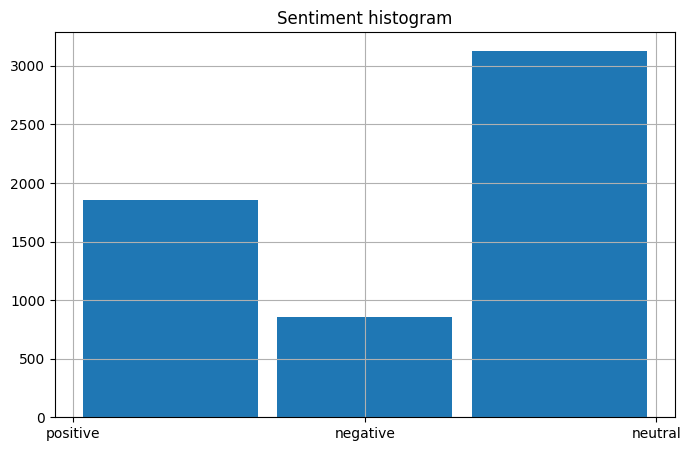

In [18]:
plt.figure(figsize=(8,5))

df.Sentiment.hist(bins=3, rwidth=0.9)

plt.title('Sentiment histogram')
plt.show()

<Axes: >

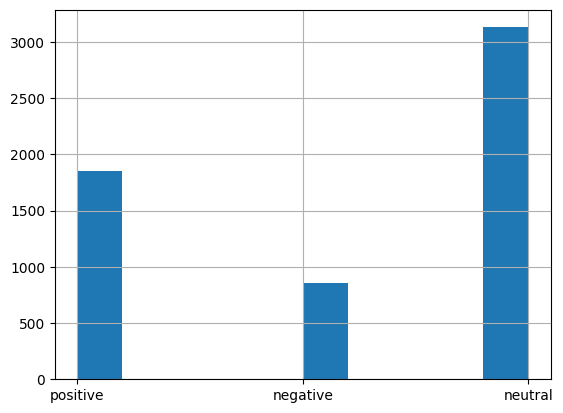

In [19]:
df.Sentiment.hist()

## Models

##### Nous allons prédire le Sentiment selon la Sentence

In [21]:
X = df.Sentence
y = df.Sentiment

##### Séparons nos données en un train et un test set, selon les 2 variables précédentes

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

##### Observons la shape de nos sets

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4673,), (1169,), (4673,), (1169,))

##### Affichons notre train set

In [24]:
X_train

1647    The floor area of the Yliopistonrinne project ...
1669    no compensation for its news , opinions or dis...
3159     RT @ACInvestorBlog $AAPL still on track for $500
4577    This includes a EUR 39.5 mn change in the fair...
4221                                    $GTE LONG at 7.44
                              ...                        
3772    @BULLYA @pollux654321 My 50 $KORS 80 Calls are...
5191    According to Sepp+ñnen , the new technology UM...
5226     $CRUS Upgraded to a buy by Alpha Street Research
5390    Favourable currency rates also contributed to ...
860     Tesco breaks its downward slide by cutting sal...
Name: Sentence, Length: 4673, dtype: object

In [25]:
y_train

1647     neutral
1669     neutral
3159    positive
4577     neutral
4221    positive
          ...   
3772    positive
5191    positive
5226    positive
5390    positive
860     positive
Name: Sentiment, Length: 4673, dtype: object

##### On étudie notre model selon une Régréssion Logistique

In [26]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()),
                     ('model', LogisticRegression())])

##### On fit notre model

In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LogisticRegression())])

##### On prédit notre test set

In [28]:
y_pred = pipeline.predict(X_test)

In [29]:
y_pred

array(['neutral', 'positive', 'negative', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

##### Observons nos Résultats

In [30]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

    negative      0.490     0.143     0.221       175
     neutral      0.708     0.899     0.792       622
    positive      0.766     0.677     0.719       372

    accuracy                          0.715      1169
   macro avg      0.655     0.573     0.578      1169
weighted avg      0.694     0.715     0.684      1169



In [31]:
score = pipeline.score(X, y)
print(f"The LR score is: {score}")

The LR score is: 0.8183841150290996


##### Réalisons un graphe comparant notre train test et les predictions

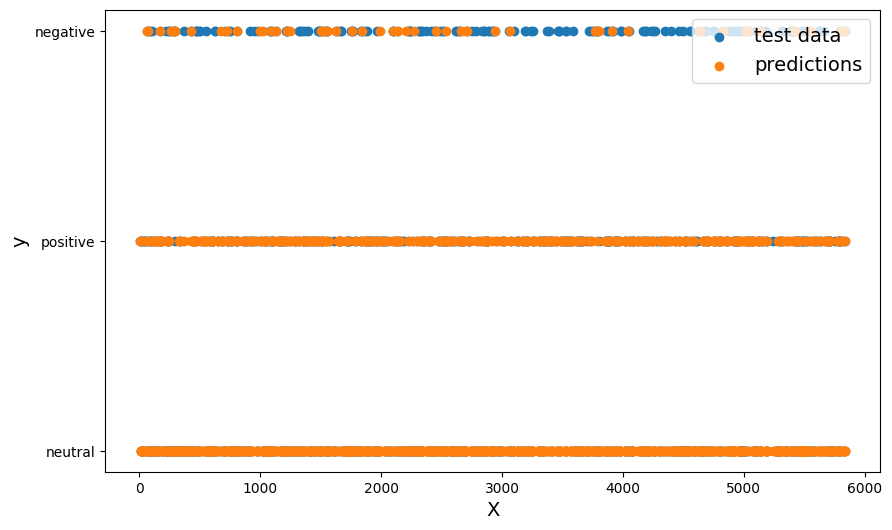

In [32]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test.index, y_test, marker = 'o', label="test data")
plt.scatter(X_test.index, y_pred, marker = 'o', label="predictions")
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=14)

plt.show()

##### Sauvegardons notre modèle

In [34]:
from joblib import dump
dump(pipeline, 'model.joblib')

['model.joblib']